In [1]:
import ee
import geemap
from geemap import ml
from sklearn import ensemble
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Inicializa la autenticación y la inicialización de Google Earth Engine
ee.Authenticate()
ee.Initialize(project='ee-facuboladerasgee')

In [23]:
# import os

# def combine_csv_files(folder_path):
#     # Lista para almacenar todos los DataFrames
#     df_list = []
    
#     # Recorrer todos los archivos en la carpeta
#     for filename in os.listdir(folder_path):
#         if filename.endswith(".csv"):
#             file_path = os.path.join(folder_path, filename)
#             # Leer cada archivo CSV y agregarlo a la lista
#             df = pd.read_csv(file_path)
#             df_list.append(df)
    
#     # Combinar todos los DataFrames en uno solo
#     combined_df = pd.concat(df_list, ignore_index=True)
    
#     return combined_df

# # Ejemplo de uso
# folder_path_2019 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2019 = combine_csv_files(folder_path_2019)


# folder_path_2020 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2020 = combine_csv_files(folder_path_2020)


# folder_path_2021 = 'C://Users//Facu//Downloads//EE_malawi-corregido_2019'
# combined_df_2021 = combine_csv_files(folder_path_2021)

# combined_df = pd.concat([combined_df_2019, combined_df_2020, combined_df_2021], ignore_index=True)


In [2]:
import os

def combine_csv_files(folder_path):
    # Lista para almacenar todos los DataFrames
    df_list = []
    
    # Recorrer todos los archivos en la carpeta
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            # Leer cada archivo CSV y agregarlo a la lista
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    # Combinar todos los DataFrames en uno solo
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

# Ejemplo de uso
folder_path_2019 = 'C://Users//Facu//Downloads//EE_malawi2020-Landast-Palsar'
combined_df = combine_csv_files(folder_path_2019)

In [3]:
combined_df['threshold'] = (combined_df['agbd_se'] / combined_df['agbd']) * 100
# combined_df = combined_df.loc[combined_df['Slope'] <= 25]

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  8452 non-null   int64  
 1   EVI           8452 non-null   float64
 2   HH_dB         8452 non-null   float64
 3   HV_dB         8452 non-null   float64
 4   MNDWI         8452 non-null   float64
 5   NDBI          8452 non-null   float64
 6   NDVI          8452 non-null   float64
 7   RVI_palsar    8452 non-null   float64
 8   SAVI          8452 non-null   float64
 9   SR_B1         8452 non-null   float64
 10  SR_B2         8452 non-null   float64
 11  SR_B3         8452 non-null   float64
 12  SR_B4         8452 non-null   float64
 13  SR_B5         8452 non-null   float64
 14  agbd          8452 non-null   float64
 15  agbd_se       8452 non-null   float64
 16  elevation     8452 non-null   float64
 17  label         8452 non-null   float64
 18  slope         8452 non-null 

In [4]:
# Filtrar los datos cuyo valor en la columna 'threshold' sea menor que 50
df_filtered = combined_df[combined_df['threshold'] < 50]

# Mostrar las primeras filas del DataFrame filtrado para verificar
df_filtered.describe()

,system:index,EVI,HH_dB,HV_dB,MNDWI,NDBI,NDVI,RVI_palsar,SAVI,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,agbd,agbd_se,elevation,label,slope,threshold
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,179.749943,1.668533,-10.057827,-16.630509,-0.210820,0.027668,0.159380,2.508004,0.239065,9209.226106,9874.441669,10431.446253,14419.301054,15386.386317,69.824705,4.775813,930.833372,3.510887,13.400513,16.631782
std,136.875057,28.720758,2.605878,3.248993,0.062377,0.063259,0.051678,0.178314,0.077516,472.495425,653.966389,1078.566528,1592.906205,2586.847764,88.269620,4.196155,402.380201,1.958372,12.784853,13.254627
min,0.000000,-188.896100,-24.493448,-31.460163,-0.355767,-0.198721,0.020353,2.103643,0.030529,8020.000000,7916.000000,7742.000000,8481.000000,7887.000000,6.036954,2.981795,474.000000,0.000000,0.000000,0.535639
25%,68.000000,0.739428,-11.898438,-18.943901,-0.251714,-0.018880,0.122458,2.404997,0.183683,8854.000000,9481.000000,9661.000000,13760.000000,13984.000000,12.696663,2.984687,592.000000,1.000000,2.780289,5.314908
50%,145.000000,1.097554,-10.119259,-16.703190,-0.225682,0.036092,0.152068,2.478226,0.228098,9236.000000,9942.500000,10531.000000,14607.500000,15858.500000,30.817364,2.990940,788.000000,5.000000,8.762081,12.694602
75%,274.000000,1.797031,-8.249460,-14.060637,-0.187543,0.078723,0.190683,2.570684,0.286019,9547.750000,10325.000000,11230.750000,15389.500000,17195.000000,96.843220,4.183544,1249.500000,5.000000,21.932621,25.586471
max,645.000000,1296.282100,2.027629,-7.063264,0.024825,0.204947,0.385143,4.970205,0.577705,12235.000000,13587.000000,14709.000000,21219.000000,22461.000000,873.749760,17.173664,1937.000000,7.000000,65.023735,49.550899


In [5]:
def remove_outliers(df, column_name):

    # Calcular la media y la desviación estándar de la columna
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    
    # Calcular el umbral para identificar los outliers
    threshold = 3 * std_dev
    
    # Crear una condición para filtrar los outliers
    condition = (df[column_name] >= (mean - threshold)) & (df[column_name] <= (mean + threshold))
    
    # Crear un nuevo DataFrame con los outliers eliminados
    df_filtered = df[condition]
    
    return df_filtered


df_filtered_remove = remove_outliers(df_filtered, "agbd")

# Mostrar las primeras filas del DataFrame filtrado
df_filtered_remove

,system:index,EVI,HH_dB,HV_dB,MNDWI,NDBI,NDVI,RVI_palsar,SAVI,SR_B1,...,SR_B3,SR_B4,SR_B5,agbd,agbd_se,elevation,label,slope,.geo,threshold
1,1,1.193595,-9.144257,-15.184239,-0.195557,-0.007616,0.177652,2.496535,0.266473,9729.0,...,11179.0,16009.0,15767.0,16.890486,2.982532,626.0,4.0,1.854334,"{""geodesic"":false,""type"":""Point"",""coordinates""...",17.658059
2,2,0.929662,-9.967008,-16.454650,-0.260280,0.057660,0.162477,2.491085,0.243711,9786.5,...,11568.5,16057.0,18022.0,7.822563,2.988732,622.0,5.0,3.379006,"{""geodesic"":false,""type"":""Point"",""coordinates""...",38.206557
13,13,0.647766,-12.215935,-18.718420,-0.228570,0.031180,0.147836,2.420405,0.221750,10038.5,...,12531.5,16879.5,17966.0,7.538536,2.989102,623.0,5.0,2.941497,"{""geodesic"":false,""type"":""Point"",""coordinates""...",39.650961
14,14,0.919438,-13.275724,-20.467903,-0.258398,0.074886,0.146988,2.426284,0.220477,9843.0,...,11521.0,15491.5,17999.5,23.034298,2.981800,629.0,5.0,2.134927,"{""geodesic"":false,""type"":""Point"",""coordinates""...",12.945044
15,15,0.568131,-12.592472,-19.248312,-0.241336,0.048631,0.134988,2.418070,0.202478,10227.0,...,12915.5,16946.5,18679.0,14.818696,2.983259,624.0,5.0,0.961924,"{""geodesic"":false,""type"":""Point"",""coordinates""...",20.131724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,11,0.993425,-12.692523,-15.584948,-0.205597,0.025886,0.146174,2.204575,0.219257,9532.0,...,11031.0,14808.0,15595.0,15.163097,2.983117,931.0,5.0,23.834902,"{""geodesic"":false,""type"":""Point"",""coordinates""...",19.673534
8443,12,1.042369,-6.844430,-18.889683,-0.194155,0.037977,0.115764,2.936131,0.173643,9291.5,...,10504.5,13255.0,14301.5,20.386400,2.981891,832.0,5.0,20.426233,"{""geodesic"":false,""type"":""Point"",""coordinates""...",14.626864
8449,18,1.191061,-12.188405,-18.209005,-0.235962,0.012964,0.192303,2.396126,0.288449,9153.0,...,10599.0,15646.0,16057.0,6.036954,2.991365,977.0,5.0,12.765172,"{""geodesic"":false,""type"":""Point"",""coordinates""...",49.550899
8450,19,1.357136,-8.174366,-16.707394,-0.206816,-0.017636,0.203746,2.685886,0.305613,9160.0,...,10458.0,15810.0,15262.0,33.775635,2.983879,966.0,4.0,15.632306,"{""geodesic"":false,""type"":""Point"",""coordinates""...",8.834413


In [6]:
df_nuevo = df_filtered_remove[df_filtered_remove['agbd'] <= 550]
# df_nuevo = df_filtered_remove[df_filtered_remove['slope'] <= 30]
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4274 entries, 1 to 8451
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  4274 non-null   int64  
 1   EVI           4274 non-null   float64
 2   HH_dB         4274 non-null   float64
 3   HV_dB         4274 non-null   float64
 4   MNDWI         4274 non-null   float64
 5   NDBI          4274 non-null   float64
 6   NDVI          4274 non-null   float64
 7   RVI_palsar    4274 non-null   float64
 8   SAVI          4274 non-null   float64
 9   SR_B1         4274 non-null   float64
 10  SR_B2         4274 non-null   float64
 11  SR_B3         4274 non-null   float64
 12  SR_B4         4274 non-null   float64
 13  SR_B5         4274 non-null   float64
 14  agbd          4274 non-null   float64
 15  agbd_se       4274 non-null   float64
 16  elevation     4274 non-null   float64
 17  label         4274 non-null   float64
 18  slope         4274 non-null   flo

In [7]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop)

columns_to_drop = ['threshold', 'agbd_se','.geo','system:index']
df_modified = drop_columns(df_nuevo, columns_to_drop)
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4274 entries, 1 to 8451
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EVI         4274 non-null   float64
 1   HH_dB       4274 non-null   float64
 2   HV_dB       4274 non-null   float64
 3   MNDWI       4274 non-null   float64
 4   NDBI        4274 non-null   float64
 5   NDVI        4274 non-null   float64
 6   RVI_palsar  4274 non-null   float64
 7   SAVI        4274 non-null   float64
 8   SR_B1       4274 non-null   float64
 9   SR_B2       4274 non-null   float64
 10  SR_B3       4274 non-null   float64
 11  SR_B4       4274 non-null   float64
 12  SR_B5       4274 non-null   float64
 13  agbd        4274 non-null   float64
 14  elevation   4274 non-null   float64
 15  label       4274 non-null   float64
 16  slope       4274 non-null   float64
dtypes: float64(17)
memory usage: 601.0 KB


In [10]:
# Obtener los nombres de las columnas excepto 'agbd' y '.geo'
features = [col for col in df_modified.columns if col not in ['agbd','.geo', 'system:index']]

# Mostrar la lista de características
print(features)

['EVI', 'HH_dB', 'HV_dB', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'elevation', 'label', 'slope']


In [17]:
feature_names =  ['EVI', 'HH_dB', 'HV_dB', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'elevation', 'label', 'slope']

# # # feature_names_s2_palsar =  ['agbd','B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'HH', 'HH_HV_div_2', 'HH_div_HV', 'HH_minus_HV', 'HH_plus_HV', 'HV', 'MNDWI', 'NDBI', 'NDVI', 'RVI_palsar', 'SAVI', 'elevation', 'slope']
# feature_names_s2_s1 =  ['B11', 'B12', 'B2', 'B3', 'B4', 'B8', 'CH', 'EVI', 'MNDWI', 'NDBI', 'NDVI', 'RVI_Descending','RVI_Ascending', 'SAVI', 'VH_Ascending', 'VH_Descending','VV_Ascending', 'VV_Descending' ,'elevation', 'label', 'slope', 'agbd']


# # # df_s2_palsar = df_modified[feature_names_s2_palsar]
# df_s2_s1 = df_modified[feature_names_s2_s1]

In [11]:
# Separar la variable objetivo 'agbd'
y = df_modified['agbd']

# Separar las variables independientes (todas excepto 'agbd' y '.geo')
X = df_modified.drop(columns=['agbd'])

y

1       16.890486
2        7.822563
13       7.538536
14      23.034298
15      14.818696
          ...    
8442    15.163097
8443    20.386400
8449     6.036954
8450    33.775635
8451    25.075060
Name: agbd, Length: 4274, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
import numpy as np
rf = RandomForestRegressor(random_state=42)

# Definir el grid de parámetros para buscar
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Entrenar el modelo con los mejores parámetros
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = best_rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Root Mean Squared Error: 31.109426603180918
R^2 Score: 0.8098146618437442


In [14]:
import numpy as np
rf = RandomForestRegressor(bootstrap= True, max_depth= 15, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, random_state=42) 


rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Calcular las métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Root Mean Squared Error: 32.3697749106197
R^2 Score: 0.794092398802362


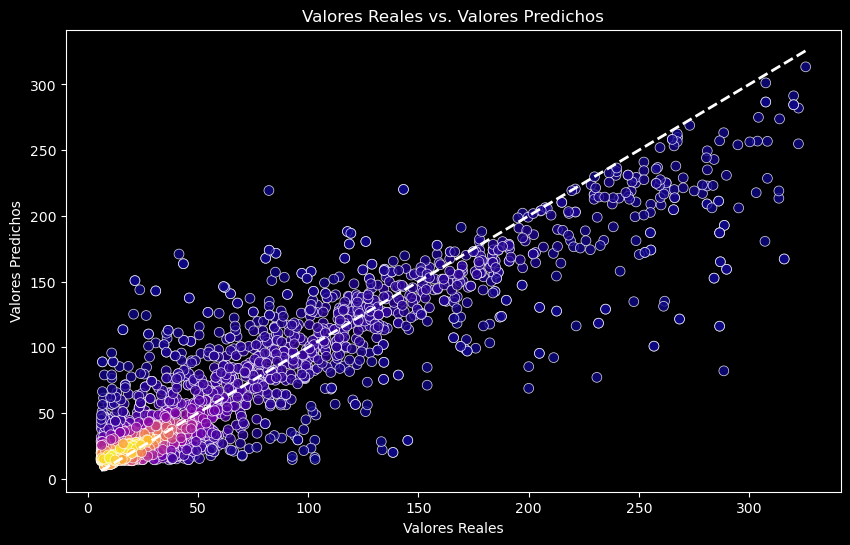

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Calcular la densidad de puntos
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# Crear un gráfico de dispersión con color basado en la densidad de puntos
plt.figure(figsize=(10, 6), facecolor='black')
scatter = plt.scatter(y_test, y_pred, c=z, s=50, cmap='plasma', edgecolor='white', alpha=0.8, linewidth=0.55)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'w--', lw=2)  # Línea de referencia en blanco
plt.xlabel('Valores Reales', color='white')
plt.ylabel('Valores Predichos', color='white')
plt.title('Valores Reales vs. Valores Predichos', color='white')

# Cambiar el color de los ejes y las etiquetas de los ticks
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().xaxis.label.set_color('white')
plt.gca().yaxis.label.set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')

# Cambiar el color del fondo del gráfico
plt.gca().set_facecolor('black')
plt.savefig('real_vs_predicho2.png', facecolor='black')

plt.show()

       Feature  Importance
15       slope    0.391344
2        HV_dB    0.187788
1        HH_dB    0.064124
13   elevation    0.045052
0          EVI    0.040226
6   RVI_palsar    0.037033
4         NDBI    0.034575
9        SR_B2    0.030410
3        MNDWI    0.028037
12       SR_B5    0.025733
10       SR_B3    0.025543
11       SR_B4    0.023302
8        SR_B1    0.022629
14       label    0.018425
7         SAVI    0.013221
5         NDVI    0.012557


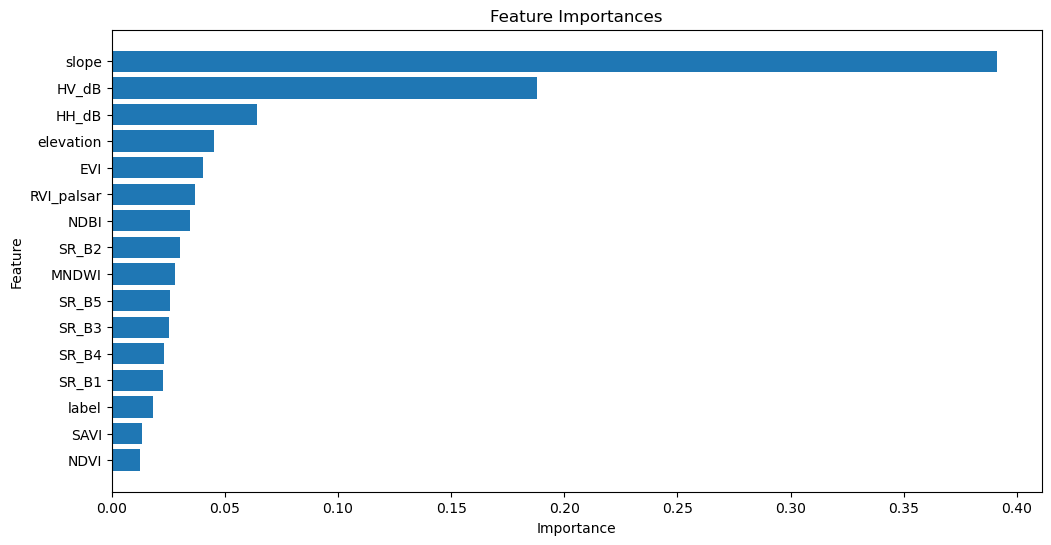

In [15]:
import matplotlib.pyplot as plt
# Obtener la importancia de las características
feature_importances = rf.feature_importances_

# Crear un DataFrame para organizar las importancias de las características
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las importancias de las características
print(feature_importances_df)

# Graficar las importancias de las características
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [18]:
# this function also works with the ensemble.ExtraTrees estimator
trees = ml.rf_to_strings(rf, feature_names,output_mode='regression')

In [20]:
# create a ee classifier to use with ee objects from the trees
ee_classifier = ml.strings_to_classifier(trees)
# ee_classifier.getInfo()

In [19]:
user_id = 'users/facuboladerasgee'
# specify asset id where to save trees
# be sure to change  to your ee user name
asset_id = user_id + "/Rf_Malawi2020-L-P"
asset_id
# kick off an export process so it will be saved to the ee asset
ml.export_trees_to_fc(trees, asset_id)

In [101]:
def export_model_in_parts(model, feature_names, user_id, base_asset_id, part_size=10):
    trees = ml.rf_to_strings(model, feature_names, output_mode='regression')
    total_trees = len(trees)
    
    # Dividir los árboles en partes
    for i in range(0, total_trees, part_size):
        part_trees = trees[i:i+part_size]
        part_asset_id = f"{base_asset_id}_part_{i//part_size}"
        
        # Exportar la parte
        ml.export_trees_to_fc(part_trees, part_asset_id)
        print(f"Parte {i//part_size} exportada a {part_asset_id}")

# Ejemplo de uso:
user_id = 'users/facuboladerasgee'
base_asset_id = f"{user_id}/Rf_Malawi2020-S1-S2"
export_model_in_parts(rf, feature_names_s2_s1, user_id, base_asset_id)

Parte 0 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_0
Parte 1 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_1
Parte 2 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_2
Parte 3 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_3
Parte 4 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_4
Parte 5 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_5
Parte 6 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_6
Parte 7 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_7
Parte 8 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_8
Parte 9 exportada a users/facuboladerasgee/Rf_Malawi2020-S1-S2_part_9


In [ ]:
# # Exporta la imagen a Google Cloud Storage
# task = ee.batch.Export.image.toCloudStorage(
#     image=image,
#     description='Sentinel-2_export',
#     bucket='your_bucket_name',  # Reemplaza con el nombre de tu bucket
#     fileNamePrefix='sentinel-2_export',
#     scale=30,
#     region=region,
#     maxPixels=1e13  # Ajusta el límite de píxeles si es necesario
# )

# # Inicia la tarea de exportación
# task.start()

# print('Export task started. Check the GCS bucket for the exported files.')